<a href="https://colab.research.google.com/github/VladimirVladetic/Gender-AgePredictor/blob/main/age_and_gender_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
"""
## Gender 90%, Age 75%
def create_model(input_shape,num_age_classes):
    inputs = Input(input_shape)

    conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu')(inputs)
    batch_1 = BatchNormalization()(conv_1)
    maxp_1 = MaxPooling2D(pool_size=(2,2))(batch_1)

    conv_2 = Conv2D(64, kernel_size=(3,3), activation='relu')(maxp_1)
    batch_2 = BatchNormalization()(conv_2)
    maxp_2 = MaxPooling2D(pool_size=(2,2))(batch_2)

    conv_3 = Conv2D(128, kernel_size=(3,3), activation='relu')(maxp_2)
    batch_3 = BatchNormalization()(conv_3)
    maxp_3 = MaxPooling2D(pool_size=(2,2))(batch_3)

    conv_4 = Conv2D(256, kernel_size=(3,3), activation='relu')(maxp_3)
    batch_4 = BatchNormalization()(conv_4)
    maxp_4 = MaxPooling2D(pool_size=(2,2))(batch_4)

    conv_5 = Conv2D(512, kernel_size=(3,3), activation='relu')(maxp_4)
    batch_5 = BatchNormalization()(conv_5)

    flatten = Flatten()(batch_5)

    dense_1_1 = Dense(256, activation='relu')(flatten)
    dense_2_1 = Dense(256, activation='relu')(flatten)

    dropout_1 = Dropout(0.3)(dense_1_1)
    dropout_2 = Dropout(0.3)(dense_2_1)

    dense_1_2 = Dense(256, activation='relu')(dropout_1)
    dense_2_2 = Dense(256, activation='relu')(dropout_2)

    output_1 = Dense(1, activation='sigmoid', name="gender_out")(dense_1_2)
    output_2 = Dense(num_age_classes, activation='softmax', name="age_out")(dense_2_2)

    model = Model(inputs=[inputs], outputs=[output_1, output_2])
    return model
"""

'\n## Gender 90%, Age 75%\ndef create_model(input_shape,num_age_classes):\n    inputs = Input(input_shape)\n\n    conv_1 = Conv2D(32, kernel_size=(3,3), activation=\'relu\')(inputs)\n    batch_1 = BatchNormalization()(conv_1)\n    maxp_1 = MaxPooling2D(pool_size=(2,2))(batch_1)\n\n    conv_2 = Conv2D(64, kernel_size=(3,3), activation=\'relu\')(maxp_1)\n    batch_2 = BatchNormalization()(conv_2)\n    maxp_2 = MaxPooling2D(pool_size=(2,2))(batch_2)\n\n    conv_3 = Conv2D(128, kernel_size=(3,3), activation=\'relu\')(maxp_2)\n    batch_3 = BatchNormalization()(conv_3)\n    maxp_3 = MaxPooling2D(pool_size=(2,2))(batch_3)\n\n    conv_4 = Conv2D(256, kernel_size=(3,3), activation=\'relu\')(maxp_3)\n    batch_4 = BatchNormalization()(conv_4)\n    maxp_4 = MaxPooling2D(pool_size=(2,2))(batch_4)\n\n    conv_5 = Conv2D(512, kernel_size=(3,3), activation=\'relu\')(maxp_4)\n    batch_5 = BatchNormalization()(conv_5)\n\n    flatten = Flatten()(batch_5)\n\n    dense_1_1 = Dense(256, activation=\'relu

In [4]:
""" OLD MODEL BEST MODEL
# Creating a custom model
def create_model(input_shape):
    inputs = Input(input_shape)
    conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu')(inputs)
    maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2 = Conv2D(64, kernel_size=(3,3), activation='relu')(maxp_1)
    maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3 = Conv2D(128, kernel_size=(3,3), activation='relu')(maxp_2)
    maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4 = Conv2D(256, kernel_size=(3,3), activation='relu')(maxp_3)
    maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)

    flatten = Flatten()(maxp_4)

    dense_1 = Dense(256, activation='relu')(flatten)
    dense_2 = Dense(256, activation='relu')(flatten)

    dropout_1 = Dropout(0.3)(dense_1)
    dropout_2 = Dropout(0.3)(dense_2)

    output_1 = Dense(1, activation='sigmoid', name="gender_out")(dropout_1)
    output_2 = Dense(7, activation='softmax', name="age_out")(dropout_2)

    model = Model(inputs=[inputs], outputs=[output_1, output_2])
    return model
"""

' OLD MODEL BEST MODEL\n# Creating a custom model\ndef create_model(input_shape):\n    inputs = Input(input_shape)\n    conv_1 = Conv2D(32, kernel_size=(3,3), activation=\'relu\')(inputs)\n    maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)\n    conv_2 = Conv2D(64, kernel_size=(3,3), activation=\'relu\')(maxp_1)\n    maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)\n    conv_3 = Conv2D(128, kernel_size=(3,3), activation=\'relu\')(maxp_2)\n    maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)\n    conv_4 = Conv2D(256, kernel_size=(3,3), activation=\'relu\')(maxp_3)\n    maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)\n\n    flatten = Flatten()(maxp_4)\n\n    dense_1 = Dense(256, activation=\'relu\')(flatten)\n    dense_2 = Dense(256, activation=\'relu\')(flatten)\n\n    dropout_1 = Dropout(0.3)(dense_1)\n    dropout_2 = Dropout(0.3)(dense_2)\n\n    output_1 = Dense(1, activation=\'sigmoid\', name="gender_out")(dropout_1)\n    output_2 = Dense(7, activation=\'softmax\', name="age_out")(dropout_

In [5]:
import numpy as np
import pandas as pd
import os
import cv2
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input, BatchNormalization
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array
import zipfile
from keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2, l1, l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import save_model, load_model
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img
#import mediapipe as mp

In [2]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
source_path = '/content/kaggle.json'
destination_path = '/root/.kaggle/kaggle.json'
kaggle_dir = '/root/.kaggle/'
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
os.rename(source_path, destination_path)

In [7]:
!kaggle datasets download -d jangedoo/utkface-new

100% 330M/331M [00:16<00:00, 23.4MB/s]
100% 331M/331M [00:16<00:00, 21.3MB/s]


In [8]:
with zipfile.ZipFile('/content/utkface-new.zip', 'r') as zip_ref:
  zip_ref.extractall('/content')

In [9]:
folder_to_delete = '/content/sample_data'
shutil.rmtree(folder_to_delete)
folder_to_delete = '/content/crop_part1'
shutil.rmtree(folder_to_delete)
folder_to_delete = '/content/utkface_aligned_cropped'
shutil.rmtree(folder_to_delete)

In [10]:
## Function returns paths to images and their associated age and gender labels
def get_image_paths_age_gender_labels(image_directory):
    image_paths = []
    age_labels = []
    gender_labels = []
    for filename in tqdm(os.listdir(image_directory )):
        image_path = os.path.join(image_directory,filename)
        temporary_data = filename.split("_")
        age = int(temporary_data[0])
        gender = int(temporary_data[1])
        image_paths.append(image_path)
        age_labels.append(age)
        gender_labels.append(gender)
    return image_paths, age_labels, gender_labels

In [11]:
## OG
##age_ranges = [(0, 2), (3, 5), (6, 20), (21, 40), (41, 60), (61, 80), (81, 120)]
## Janja age ranges
## 0-2 3-9 10-20 21-29 30-45 46-60 61-80 81-120
##Adience age ranges
##age_ranges = [(0, 3), (4, 6), (7, 13), (14, 23), (24, 36), (37, 48), (49, 69), (60,120)]

In [12]:
def map_age_to_category(age):
  age_ranges = [(0, 2), (3, 9), (10, 20), (21, 29), (30, 45), (46, 60), (61, 80), (81, 120)]
  for category, (min_age, max_age) in enumerate(age_ranges, start=0):
          if min_age <= age <= max_age:
              return category
  return 0

In [13]:
### EDA ###

## Function takes the first 16 images of the dataset and displays them
def show_examples(df, gender_dictionary, start_image_index):
    number_of_images = 16
    plt.figure(figsize=(number_of_images,number_of_images))
    files = df.iloc[start_image_index:start_image_index + number_of_images]
    i = 0
    for index, image, age, gender in files.itertuples():
        i+=1
        plt.subplot(4,4, i)
        var_image = load_img(image)
        var_image = np.array(var_image)
        plt.imshow(var_image)
        plt.title(f"Age: {age} Gender: {gender_dictionary[gender]}")
        plt.axis("off")
    plt.show()

# Plotting bar graph for gender
def plot_gender(df):
    plt.figure(figsize=(10, 5))
    df['gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

# Plotting age histogram
def plot_age(df):
    plt.figure(figsize=(15, 5))
    df['age'].plot(kind='hist', bins=20, edgecolor='black')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

In [14]:
# Extracting features from the images
def extract_features(images, height, width):
    features = []
    for image in tqdm(images):
        var_img = load_img(image, grayscale = True)
        var_img = var_img.resize((height,width), Image.ANTIALIAS)
        var_img = np.array(var_img)
        ## Normalization of images
        var_img = var_img / 255.0
        features.append(var_img)
    features = np.array(features)
    features = features.reshape(len(features), height, width, 1)
    ## from float64 to float32
    features = np.array(features, dtype=np.float32)
    return features

In [15]:
def display_gender_acc_graph(history):
    acc = history.history["gender_out_accuracy"]
    val_acc = history.history["val_gender_out_accuracy"]
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'b', label="Training Accuracy")
    plt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
    plt.title("Gender Accuracy Graph")
    plt.legend()
    plt.figure()

def display_gender_loss_graph(history):
    loss = history.history["gender_out_loss"]
    val_loss = history.history["val_gender_out_loss"]
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'b', label="Training Loss")
    plt.plot(epochs, val_loss, 'r', label="Validation Loss")
    plt.title("Gender Loss Graph")
    plt.legend()
    plt.show()

def display_age_acc_graph(history):
    acc = history.history["age_out_accuracy"]
    val_acc = history.history["val_age_out_accuracy"]
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'b', label="Training Accuracy")
    plt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
    plt.title("Age Accuracy Graph")
    plt.legend()
    plt.figure()

def display_age_loss_graph(history):
    loss = history.history["age_out_loss"]
    val_loss = history.history["val_age_out_loss"]
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'b', label="Training Loss")
    plt.plot(epochs, val_loss, 'r', label="Validation Loss")
    plt.title("Age Loss Graph")
    plt.legend()
    plt.show()

In [26]:
def create_model(input_shape,num_age_classes):
    inputs = Input(input_shape)

    conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(inputs)
    batch_1 = BatchNormalization()(conv_1)
    conv_2 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='same')(batch_1)
    batch_2 = BatchNormalization()(conv_2)
    conv_3 = Conv2D(128, kernel_size=(3,3), activation='relu', padding='same')(batch_2)
    batch_3 = BatchNormalization()(conv_3)

    maxpool_1 = MaxPooling2D(pool_size=(2,2))(batch_3)
    dropout_1 = Dropout(0.25)(maxpool_1)

    conv_4 = Conv2D(128, kernel_size=(3,3), activation='relu', padding='same')(dropout_1)
    batch_4 = BatchNormalization()(conv_4)
    conv_5 = Conv2D(128, kernel_size=(3,3), activation='relu', padding='same')(batch_4)
    batch_5 = BatchNormalization()(conv_5)

    maxpool_2 = MaxPooling2D(pool_size=(2,2))(batch_5)
    dropout_2 = Dropout(0.25)(maxpool_2)

    conv_6 = Conv2D(128, kernel_size=(3,3), activation='relu', padding='same')(dropout_2)
    batch_6 = BatchNormalization()(conv_6)
    conv_7 = Conv2D(128, kernel_size=(3,3), activation='relu', padding='same')(batch_6)
    batch_7 = BatchNormalization()(conv_7)

    maxpool_3 = MaxPooling2D(pool_size=(2,2))(batch_7)
    dropout_3 = Dropout(0.25)(maxpool_3)

    conv_8 = Conv2D(256, kernel_size=(3,3), activation='relu', padding='same')(dropout_3)
    batch_8 = BatchNormalization()(conv_8)
    conv_9 = Conv2D(256, kernel_size=(3,3), activation='relu', padding='same')(batch_8)
    batch_9 = BatchNormalization()(conv_9)

    flatten = Flatten()(batch_9)

    dense_1_1 = Dense(256, activation='relu')(flatten)
    dense_2_1 = Dense(256, activation='relu')(flatten)

    dropout_1 = Dropout(0.3)(dense_1_1)
    dropout_2 = Dropout(0.3)(dense_2_1)

    dense_1_2 = Dense(128, activation='relu')(dropout_1)
    dense_2_2 = Dense(128, activation='relu')(dropout_2)

    output_1 = Dense(1, activation='sigmoid', name="gender_out")(dense_1_2)
    output_2 = Dense(num_age_classes, activation='softmax', name="age_out")(dense_2_2)

    model = Model(inputs=[inputs], outputs=[output_1, output_2])
    return model


In [27]:
import cv2
import numpy as np

def augment_data_for_selected_age_categories(images, age_labels, gender_labels, selected_age_categories, augmentation_factor=1):
    augmented_images = []
    augmented_age_labels = []
    augmented_gender_labels = []

    for image, age_label, gender_label in zip(images, age_labels, gender_labels):
        # Check if the age label is in the specified age categories
        if np.any(np.isin(age_label, selected_age_categories)):
            img_array = np.array(image)

            # Rotate the image by 3 degrees
            angle = 3
            rotated_image = cv2.rotate(img_array, cv2.ROTATE_90_CLOCKWISE)

            # Flip the image horizontally
            flipped_image = cv2.flip(img_array, 1)

            # Slightly adjust brightness
            brightness_adjusted_image = cv2.convertScaleAbs(img_array, alpha=1.1, beta=10)

            # Extend the augmented images list
            augmented_images.extend([rotated_image, flipped_image, brightness_adjusted_image])

            # Copy age and gender labels for each augmented image
            for _ in range(augmentation_factor):
                augmented_age_labels.append(age_label)
                augmented_gender_labels.append(gender_label)

    return np.array(augmented_images), np.array(augmented_age_labels), np.array(augmented_gender_labels)


In [28]:
## Set image Directory
image_directory = "/content/UTKFace/"

image_paths, age_labels, gender_labels = get_image_paths_age_gender_labels(image_directory)

age_categories = [map_age_to_category(age) for age in age_labels]

## Set Dictionary
gender_dictionary = {0:"Male",1:"Female"}

## Structure of df: INDEX, PICTURE FILEPATH, AGE LABEL, GENDER LABEL
df = pd.DataFrame()
df["image"], df["age"], df["gender"] = image_paths, age_categories, gender_labels
##print(df)

  0%|          | 0/23708 [00:00<?, ?it/s]

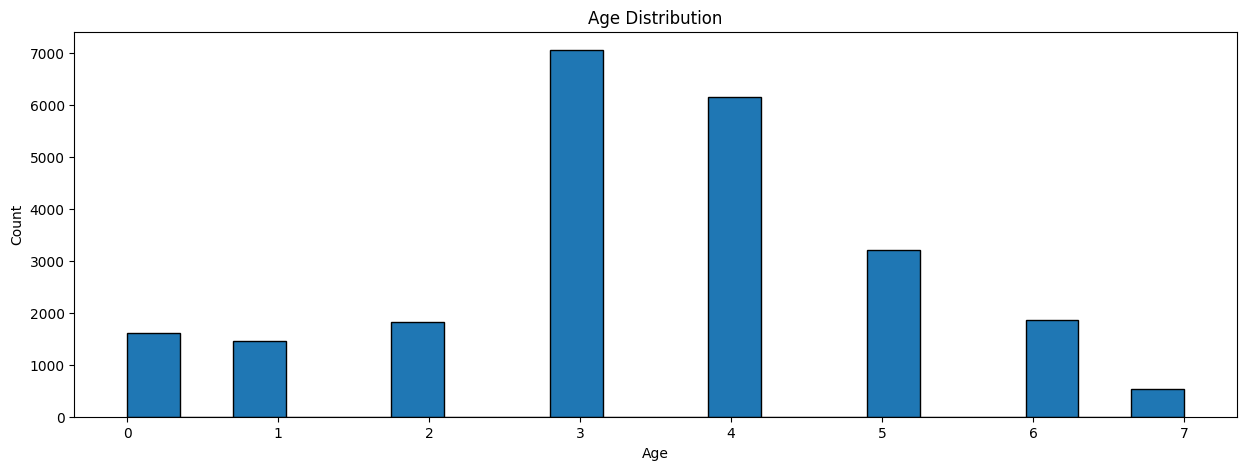

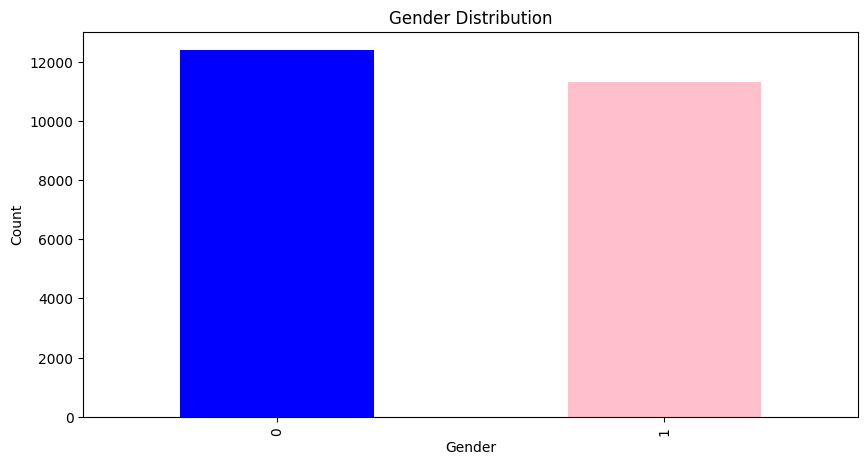

In [29]:
### EDA ###

##show_examples(df, gender_dictionary, 500)

plot_age(df)

plot_gender(df)

In [30]:
image_height = 128
image_width = 128
num_age_classes = 8

In [31]:
X = extract_features(df["image"],image_height,image_width)

y_gender = np.array(df["gender"])
y_age = np.array(df["age"])

y_age = np.array(list(df["age"].apply(lambda x: to_categorical(x, num_classes=num_age_classes))))

y_gender_tensor = tf.convert_to_tensor(y_gender, dtype=tf.float32)
y_age_tensor = tf.convert_to_tensor(y_age, dtype=tf.float32)

input_shape = (image_height,image_width,1)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [32]:
print(len(X))
print(len(y_age))

23708
23708


In [ ]:
selected_age_categories = [1, 7]
X, y_age, y_gender = augment_data_for_selected_age_categories(X, y_age, y_gender, selected_age_categories)

In [24]:
print(len(X))
print(len(y_age))

'print(len(X))\nprint(len(y_age))'

In [25]:
opt = Adam(learning_rate=0.001)

model = create_model(input_shape, num_age_classes)

model.compile(loss=["binary_crossentropy", "categorical_crossentropy"], optimizer = opt, metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5)

history = model.fit(x=X, y=[y_gender_tensor, y_age_tensor], batch_size=32, epochs=50, validation_split=0.2, callbacks=[lr_scheduler, early_stopping])

Epoch 1/50
593/593 [==============================] - 179s 269ms/step - loss: 2.3829 - gender_out_loss: 0.5664 - age_out_loss: 1.8165 - gender_out_accuracy: 0.7417 - age_out_accuracy: 0.3123 - val_loss: 2.0884 - val_gender_out_loss: 0.3895 - val_age_out_loss: 1.6990 - val_gender_out_accuracy: 0.8267 - val_age_out_accuracy: 0.3321 - lr: 0.0010
Epoch 2/50
593/593 [==============================] - 154s 259ms/step - loss: 2.0051 - gender_out_loss: 0.3744 - age_out_loss: 1.6307 - gender_out_accuracy: 0.8252 - age_out_accuracy: 0.3624 - val_loss: 1.7928 - val_gender_out_loss: 0.3240 - val_age_out_loss: 1.4689 - val_gender_out_accuracy: 0.8570 - val_age_out_accuracy: 0.4348 - lr: 0.0010
Epoch 3/50
593/593 [==============================] - 154s 260ms/step - loss: 1.8395 - gender_out_loss: 0.3243 - age_out_loss: 1.5152 - gender_out_accuracy: 0.8548 - age_out_accuracy: 0.3997 - val_loss: 1.5759 - val_gender_out_loss: 0.2743 - val_age_out_loss: 1.3016 - val_gender_out_accuracy: 0.8758 - val_age

KeyboardInterrupt: 

In [ ]:
model.save("/content/model2.h5")

In [ ]:
display_gender_acc_graph(history)

display_gender_loss_graph(history)

display_age_acc_graph(history)

display_age_loss_graph(history)